# Land Application

In [1]:
import PFAS_SAT as ps
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)
import warnings
warnings.filterwarnings('ignore')

## Model document

Finished compost and dewatered, stabilized WWT solids are both suitable for land application. Once these materials are land applied, PFAS may volatize, be released to surface or ground- water, or sorbed to the soil/waste stream mixture. The flow of PFAS from land application is modeled using a liquid-solid partition coefficient normalized to the amount of organic carbon, combined with a water balance to track the flow of PFAS from the soil. Model predictions are based on achievement of equilibrium. By default, it is assumed that no volatilization occurs, but a user can enter a fraction of PFAS that volatilizes. It is further assumed that the land applied material is well mixed with the top layer of soil (thickness is a user input). The partition coefficient is used to estimate the concentration of PFAS in the liquid and solids. The concentration in the liquid changes throughout the year as PFAS runs off or is leached to the groundwater (i.e., it is assumed that annual precipitation is uniform throughout the year and continuously removes PFAS from the mixture). The user enters a run-off coefficient based on the soil type, land use, grade, and vegetation. The run-off is assumed to be released to surface water. Another fraction of the precipitation is removed via evapotranspiration (ET) based on the local climate and vegetation. The remaining precipitation is assumed to leach into groundwater. The PFAS remaining in the soil may be taken up by and bioaccumulate in plants. While PFAS uptake by plants was not modeled in this initial version of the SAT, it may be an important PFAS fate pathway as plants may enter the food chain depending on what is grown. 

<img src="../Images/ProcessModels/Land_Application_Diagram.png" alt="Drawing" style="width: 400px;"/>

### Assumptions and Limitations:
1.	The organic carbon-normalized partition coefficient assumes that the organic carbon in the soil has the same PFAS sorption capacity as the organic carbon in either the compost or the dewatered, stabilized WWT solids in the land applied material.
2.	The water balance model is averaged over a year and ignores potential effects from intense rains that may lead to substantial additional erosion and loss of solids and associated PFAS.
3.	Apart from precipitation, the water balance does not consider other external water inputs such as irrigation. This could be included by adjusting the precipitation input value. 
4.	Volatilization is assumed to be zero by default due to a lack of data. However, the user may assign a fraction of the PFAS to be volatilized.
5.	Future work is also required to implement a dynamic model to account for changes in the organic C content of over time as land-applied materials decompose, and to account for episodic precipitation events. 
6.	The loading rate for the land application of dewatered WWT solids will vary based on solids properties among other factors. The loading rate default values given here reflect a typical annual loading rate for application to agricultural land growing corn. 

## Input Parameters for Land Application model

In [2]:
LandApp = ps.LandApp()
LandApp.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','minimum','maximum','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,minimum,maximum,Reference
0,Log partition coefficient,LogPartCoef,PFOA,PFOA Log Koc (soils/sediments),2.190,log L/kg OC,1.300,4.500,"[2,3,4,5]"
1,Log partition coefficient,LogPartCoef,PFOS,PFOS Log Koc (soils/sediments),3.040,log L/kg OC,2.400,4.700,"[2,3,4,5]"
2,Log partition coefficient,LogPartCoef,PFBA,PFBA Log Koc (soils/sediments),1.880,log L/kg OC,1.300,1.880,"[2,3,4,5]"
3,Log partition coefficient,LogPartCoef,PFPeA,PFPeA Log Koc (soils/sediments),1.370,log L/kg OC,NaN,NaN,"[2,3,4,5]"
4,Log partition coefficient,LogPartCoef,PFHxA,PFHxA Log Koc (soils/sediments),1.770,log L/kg OC,1.310,2.100,"[2,3,4,5]"
5,Log partition coefficient,LogPartCoef,PFHpA,PFHpA Log Koc (soils/sediments),1.970,log L/kg OC,NaN,2.190,"[2,3,4,5]"
6,Log partition coefficient,LogPartCoef,PFNA,PFNA Log Koc (soils/sediments),2.630,log L/kg OC,2.300,3.180,"[2,3,4,5]"
7,Log partition coefficient,LogPartCoef,PFDA,PFDA Log Koc (soils/sediments),3.240,log L/kg OC,2.650,3.780,"[2,3,4,5]"
8,Log partition coefficient,LogPartCoef,PFBS,PFBS Log Koc (soils/sediments),1.510,log L/kg OC,NaN,1.790,"[2,3,4,5]"
9,Log partition coefficient,LogPartCoef,PFHxS,PFHxS Log Koc (soils/sediments),2.790,log L/kg OC,2.050,2.875,"[2,3,4,5]"


## Incoming Compost to land application

In [3]:
IncominWaste = ps.IncomFlow()
IncominWaste.set_flow('Compost', 1000)
IncominWaste.calc()
Compost = IncominWaste.Inc_flow
Compost.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,600
2,Moisture flow,kg,400
3,VS flow,kg,360
4,Carbon flow,kg,168
5,PFOA,μg,5240
6,PFOS,μg,7375
7,PFBA,μg,3267
8,PFPeA,μg,3424
9,PFHxA,μg,16407


## PFAS balance in land application

In [4]:
LandApp.calc(Inc_flow=Compost)
LandApp.report(normalized=True)

,Volatilized,Remaining in Soil,Leachate,Runoff
PFOA,0.0,25.35,67.19,7.47
PFOS,0.0,81.56,16.60,1.84
PFBA,0.0,7.10,83.61,9.29
PFPeA,0.0,0.10,89.91,9.99
PFHxA,0.0,3.68,86.69,9.63
PFHpA,0.0,11.14,79.98,8.89
PFNA,0.0,59.62,36.34,4.04
PFDA,0.0,87.89,10.90,1.21
PFBS,0.0,0.45,89.59,9.95
PFHxS,0.0,69.75,27.22,3.02


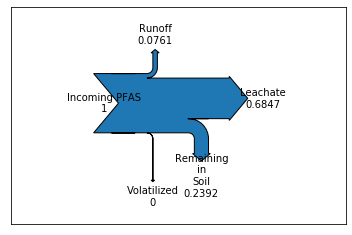

In [5]:
LandApp.plot_sankey()

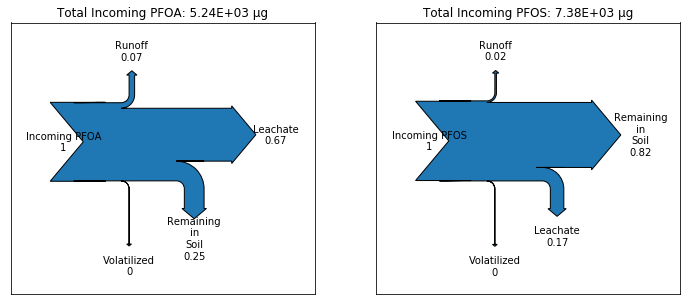

In [6]:
LandApp.plot_sankey_report(margin=0.5)